In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 1. 필요한 라이브러리 불러오기

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# model
from sklearn.linear_model import LogisticRegression

# 2. 데이터 불러오기 및 확인

In [4]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/과제테스트/diabetes.csv")

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1




```
Pregnancies : 임신횟수
Glucose : 혈당 (포도당 농도)
BloodPressure : 혈압
SkinThickness : 팔 삼두근 뒤쪽의 피하지방 측정값(nm)
Insulin : 혈청 인슐린(mu U/ml)
BMI : 체질량지수(체중(kg)/(키(m))^2)
DiabetesPedigreeFunction : 당뇨 내력 가중치 값
Age : 나이
Outcome : 당뇨병 여부(0: 발병되지 않음, 1: 발병)
```



In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
data.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


## 0값 처리  
- Nan
- 평균값
- 중앙값

In [13]:
data['Glucose'].value_counts()[0]

5

In [11]:
# Glucose	BloodPressure	SkinThickness	Insulin	BMI	DiabetesPedigreeFunction
data[data['Glucose'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [15]:
print(data['Insulin'].value_counts()[0])
data[data['Insulin']==0]

374


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,0,0,30.1,0.349,47,1


**혈당이 148, 183 이런 상태에서 Insulin이 0일 수 있나? 근데 당뇨병 환자이긴 하다**   
-> 우선 데이터를 살펴본 후 0값을 어떻게 처리할 지 판단해야겠다.

In [17]:
(data['Insulin'] == 0).mean() # 다소 많긴하다

0.4869791666666667

# 3. 데이터 시각화

<Axes: xlabel='Outcome', ylabel='Pregnancies'>

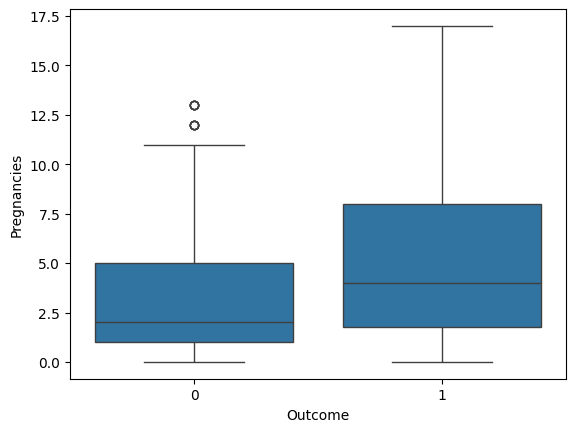

In [29]:
sns.boxplot(x= 'Outcome', y='Pregnancies',data=data )

<Axes: xlabel='Outcome', ylabel='Age'>

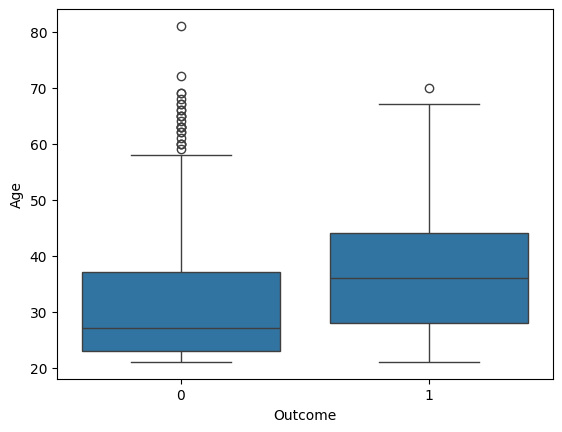

In [30]:
sns.boxplot(x= 'Outcome', y='Age',data=data )


<Axes: xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

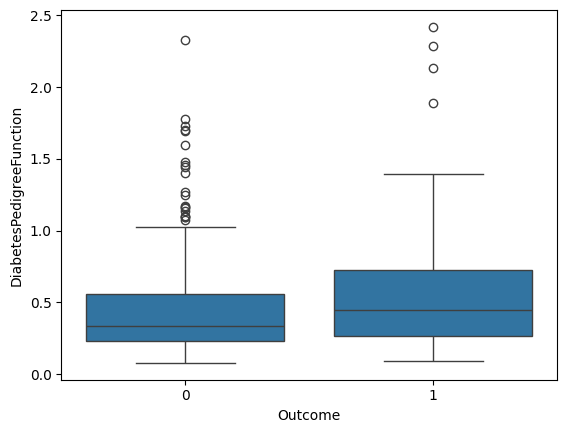

In [32]:
sns.boxplot(x= 'Outcome', y='DiabetesPedigreeFunction',data=data )


<Axes: xlabel='Outcome', ylabel='BMI'>

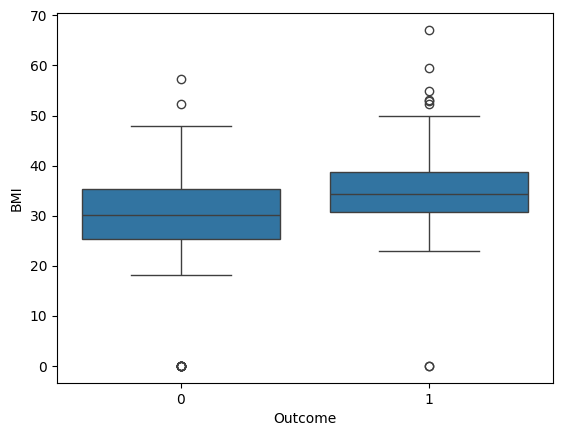

In [34]:
sns.boxplot(x= 'Outcome', y='BMI',data=data )


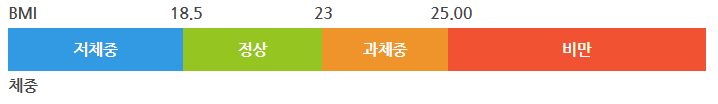